In [2]:
%reload_ext autoreload
%autoreload 2

### Quality Metric Calculation (Tetrode data)
This notebook is done after spikesorting before manual curation.

Shijie Gu
Nov 12, 2024

In [2]:
import os
import warnings
import datajoint as dj
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=ResourceWarning)

from spyglass.spikesorting.v0 import SpikeSorting,SortInterval
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.spikesorting.v0.spikesorting_curation import WaveformParameters,WaveformSelection,Waveforms
from spyglass.decoding.v0.clusterless import UnitMarks #not using data from the table but some functions associated with it
from spyglass.shijiegu.decodeHelpers import runSessionNames, sleepSessionNames

from spyglass.shijiegu.singleUnit import qualityMetric_master, fillQualityMetric

[2025-06-16 11:41:53,066][INFO]: DataJoint 0.14.4 connected to shijiegu-alt@lmf-db.cin.ucsf.edu:3306


In [3]:
from spyglass.common import IntervalList

In [4]:
import spyglass.spikesorting.v0 as sgs

In [5]:
# Define the name of the file that you copied and renamed from previous tutorials
nwb_file_name = "lewis20240113.nwb"
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

intervals, _ = runSessionNames(nwb_copy_file_name)
intervals2, _ = sleepSessionNames(nwb_copy_file_name)
print(intervals)
#sort_group_id = 0
#uration_id = 0

['02_Rev2Session1', '04_Rev2Session2', '06_Rev2Session3', '08_Rev2Session4']


In [ ]:
for session_name in intervals: #+ intervals2:
    qualityMetric_master(nwb_copy_file_name,session_name,parent_curation_id = -1)

[06:48:40][WARNING] Spyglass: Turning off transaction protection this table by default. Use use_transation=True to re-enable.
Read more about transactions:
https://docs.datajoint.io/python/definition/05-Transactions.html
https://github.com/LorenFrankLab/spyglass/issues/1030
Read more about transactions:
https://docs.datajoint.io/python/definition/05-Transactions.html
https://github.com/LorenFrankLab/spyglass/issues/1030
[2025-06-13 06:48:44,000][WARNING]: Skipped checksum for file with hash: 4693331b-f55e-1521-9a4c-355250de6cb5, and path: /stelmo/nwb/raw/klein20231107_.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.10/site-packages/pynwb/behavior.py:48: UserWarning: SpatialSeries 'series_0' has data shape (27816, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglas

extract waveforms shared_memory multi buffer:   0%|          | 0/1 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/1 [00:00<?, ?it/s]

/home/shijiegu/anaconda3/envs/spyglass/lib/python3.10/site-packages/hdmf/build/objectmapper.py:687: MissingRequiredBuildWarning: NWBFile 'root' is missing required value for attribute 'source_script_file_name'.
  warnings.warn(msg, MissingRequiredBuildWarning)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.10/site-packages/hdmf/build/objectmapper.py:267: DtypeConversionWarning: Spec 'Units/spike_times': Value with data type int64 is being converted to data type float64 as specified.
  warnings.warn(full_warning_msg, DtypeConversionWarning)
[2025-06-13 06:50:23,105][WARNING]: Skipped checksum for file with hash: 4693331b-f55e-1521-9a4c-355250de6cb5, and path: /stelmo/nwb/raw/klein20231107_.nwb
[06:50:23][WARNING] Spyglass: Turning off transaction protection this table by default. Use use_transation=True to re-enable.
Read more about transactions:
https://docs.datajoint.io/python/definition/05-Transactions.html
https://github.com/LorenFrankLab/spyglass/issues/1030
Read more about tra

extract waveforms shared_memory multi buffer:   0%|          | 0/1 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/1 [00:00<?, ?it/s]

/home/shijiegu/anaconda3/envs/spyglass/lib/python3.10/site-packages/hdmf/build/objectmapper.py:687: MissingRequiredBuildWarning: NWBFile 'root' is missing required value for attribute 'source_script_file_name'.
  warnings.warn(msg, MissingRequiredBuildWarning)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.10/site-packages/hdmf/build/objectmapper.py:267: DtypeConversionWarning: Spec 'Units/spike_times': Value with data type int64 is being converted to data type float64 as specified.
  warnings.warn(full_warning_msg, DtypeConversionWarning)
[2025-06-13 06:56:31,799][WARNING]: Skipped checksum for file with hash: 4693331b-f55e-1521-9a4c-355250de6cb5, and path: /stelmo/nwb/raw/klein20231107_.nwb
[06:56:31][WARNING] Spyglass: Turning off transaction protection this table by default. Use use_transation=True to re-enable.
Read more about transactions:
https://docs.datajoint.io/python/definition/05-Transactions.html
https://github.com/LorenFrankLab/spyglass/issues/1030
Read more about tra

In [21]:
for session_name in intervals2:
    qualityMetric_master(nwb_copy_file_name,session_name,parent_curation_id = -1)

In [8]:
sgs.SpikeSorting & {"nwb_file_name": nwb_copy_file_name,
                               "sorter":"mountainsort4"}

nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,sorting_path,"time_of_sort in Unix time, to the nearest second"
klein20231107_.nwb,0,02_Rev2Session1,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_02_Rev2Session1_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_02_Rev2Session1_0_franklab_tetrode_hippocampus_2279da71_spikesorting,1749250874
klein20231107_.nwb,0,04_Rev2Session2,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_04_Rev2Session2_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_04_Rev2Session2_0_franklab_tetrode_hippocampus_4e4d93ce_spikesorting,1749252535
klein20231107_.nwb,0,06_Rev2Session3,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_06_Rev2Session3_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_06_Rev2Session3_0_franklab_tetrode_hippocampus_5f41440e_spikesorting,1749253932
klein20231107_.nwb,0,08_Rev2Session4,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_08_Rev2Session4_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_08_Rev2Session4_0_franklab_tetrode_hippocampus_d6519b14_spikesorting,1749255788
klein20231107_.nwb,0,10_Rev2Session5,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_10_Rev2Session5_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_10_Rev2Session5_0_franklab_tetrode_hippocampus_6d4c7034_spikesorting,1749257756
klein20231107_.nwb,10,02_Rev2Session1,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_02_Rev2Session1_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_02_Rev2Session1_10_franklab_tetrode_hippocampus_bcf4064b_spikesorting,1749250994
klein20231107_.nwb,10,04_Rev2Session2,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_04_Rev2Session2_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_04_Rev2Session2_10_franklab_tetrode_hippocampus_8bba543f_spikesorting,1749252629
klein20231107_.nwb,10,06_Rev2Session3,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_06_Rev2Session3_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_06_Rev2Session3_10_franklab_tetrode_hippocampus_4356a485_spikesorting,1749254063
klein20231107_.nwb,10,08_Rev2Session4,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_08_Rev2Session4_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_08_Rev2Session4_10_franklab_tetrode_hippocampus_4e9a79ba_spikesorting,1749255931
klein20231107_.nwb,10,10_Rev2Session5,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_10_Rev2Session5_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_10_Rev2Session5_10_franklab_tetrode_hippocampus_692b19dc_spikesorting,1749257887


In [9]:
(sgs.QualityMetrics & {
                                "nwb_file_name": nwb_copy_file_name,
                                "sorter":"mountainsort4"})

curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,waveform_params_name name of waveform extraction parameters,metric_params_name,quality_metrics_path,analysis_file_name name of the file,object_id Object ID for the metrics in NWB file
0,klein20231107_.nwb,0,02_Rev2Session1,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_02_Rev2Session1_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,default_clusterless,franklab_default3,/stelmo/nwb/waveforms/klein20231107_.nwb_aefc024c_0_default_clusterless_waveforms_qm.json,klein20231107_54B46IZCVD.nwb,69c69efd-c60f-4df4-bf89-9fa50d31ec49
0,klein20231107_.nwb,0,04_Rev2Session2,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_04_Rev2Session2_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,default_clusterless,franklab_default3,/stelmo/nwb/waveforms/klein20231107_.nwb_b146dc06_0_default_clusterless_waveforms_qm.json,klein20231107_AHY2HRT78S.nwb,b524d0c3-90a7-415f-903f-d35233f0b628
0,klein20231107_.nwb,0,06_Rev2Session3,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_06_Rev2Session3_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,default_clusterless,franklab_default3,/stelmo/nwb/waveforms/klein20231107_.nwb_1eb4a67e_0_default_clusterless_waveforms_qm.json,klein20231107_LTKYGW0FE7.nwb,f468c7db-7bfd-4da9-b15d-a6da01f68cef
0,klein20231107_.nwb,0,08_Rev2Session4,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_08_Rev2Session4_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,default_clusterless,franklab_default3,/stelmo/nwb/waveforms/klein20231107_.nwb_3ed57f9b_0_default_clusterless_waveforms_qm.json,klein20231107_KX86ZFDZCI.nwb,96dc6a92-d122-48c9-a634-1bf497976a4c
0,klein20231107_.nwb,0,10_Rev2Session5,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_10_Rev2Session5_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,default_clusterless,franklab_default3,/stelmo/nwb/waveforms/klein20231107_.nwb_408f59f2_0_default_clusterless_waveforms_qm.json,klein20231107_TY057TY1T3.nwb,d596a130-f1e2-44f2-b81c-15ebcdc0ac81
0,klein20231107_.nwb,10,02_Rev2Session1,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_02_Rev2Session1_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,default_clusterless,franklab_default3,/stelmo/nwb/waveforms/klein20231107_.nwb_7ff174b6_0_default_clusterless_waveforms_qm.json,klein20231107_PFVBLZ5YHH.nwb,ae295ae5-b869-4728-b558-a96cbc69fd56
0,klein20231107_.nwb,10,04_Rev2Session2,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_04_Rev2Session2_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,default_clusterless,franklab_default3,/stelmo/nwb/waveforms/klein20231107_.nwb_d10ec08a_0_default_clusterless_waveforms_qm.json,klein20231107_YATZN56RXU.nwb,58d6d6cd-0962-4bcd-a143-0a602a258f03
0,klein20231107_.nwb,10,06_Rev2Session3,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_06_Rev2Session3_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,default_clusterless,franklab_default3,/stelmo/nwb/waveforms/klein20231107_.nwb_78e7b715_0_default_clusterless_waveforms_qm.json,klein20231107_NG2IACYYHU.nwb,e49

In [10]:
(sgs.SpikeSorting & {"nwb_file_name": nwb_copy_file_name,
                               "sorter":"mountainsort4"})#.delete()

nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,sorting_path,"time_of_sort in Unix time, to the nearest second"
klein20231107_.nwb,0,02_Rev2Session1,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_02_Rev2Session1_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_02_Rev2Session1_0_franklab_tetrode_hippocampus_2279da71_spikesorting,1749250874
klein20231107_.nwb,0,04_Rev2Session2,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_04_Rev2Session2_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_04_Rev2Session2_0_franklab_tetrode_hippocampus_4e4d93ce_spikesorting,1749252535
klein20231107_.nwb,0,06_Rev2Session3,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_06_Rev2Session3_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_06_Rev2Session3_0_franklab_tetrode_hippocampus_5f41440e_spikesorting,1749253932
klein20231107_.nwb,0,08_Rev2Session4,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_08_Rev2Session4_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_08_Rev2Session4_0_franklab_tetrode_hippocampus_d6519b14_spikesorting,1749255788
klein20231107_.nwb,0,10_Rev2Session5,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_10_Rev2Session5_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_10_Rev2Session5_0_franklab_tetrode_hippocampus_6d4c7034_spikesorting,1749257756
klein20231107_.nwb,10,02_Rev2Session1,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_02_Rev2Session1_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_02_Rev2Session1_10_franklab_tetrode_hippocampus_bcf4064b_spikesorting,1749250994
klein20231107_.nwb,10,04_Rev2Session2,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_04_Rev2Session2_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_04_Rev2Session2_10_franklab_tetrode_hippocampus_8bba543f_spikesorting,1749252629
klein20231107_.nwb,10,06_Rev2Session3,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_06_Rev2Session3_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_06_Rev2Session3_10_franklab_tetrode_hippocampus_4356a485_spikesorting,1749254063
klein20231107_.nwb,10,08_Rev2Session4,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_08_Rev2Session4_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_08_Rev2Session4_10_franklab_tetrode_hippocampus_4e9a79ba_spikesorting,1749255931
klein20231107_.nwb,10,10_Rev2Session5,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie_whiten,klein20231107_.nwb_10_Rev2Session5_10_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,/stelmo/nwb/sorting/klein20231107_.nwb_10_Rev2Session5_10_franklab_tetrode_hippocampus_692b19dc_spikesorting,1749257887


In [6]:
assert len(sgs.SpikeSorting & {"nwb_file_name": nwb_copy_file_name,
                               "sorter":"mountainsort4"}) == len(sgs.QualityMetrics & {
                                "nwb_file_name": nwb_copy_file_name,
                                "sorter":"mountainsort4"})

### End here

In [ ]:
key = {}
key[]

In [7]:
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)
ss_key = {"nwb_file_name": nwb_copy_file_name,"sorter":"mountainsort4",
         "sort_interval_name":session_name,
          "sort_group_id":sort_group_id,
          "curation_id":curation_id}

In [8]:
metrics_path = (sgs.QualityMetrics & ss_key).fetch1("quality_metrics_path")
with open(metrics_path) as f:
    quality_metrics = json.load(f)
quality_metrics

DataJointError: fetch1 should only return one tuple. 0 tuples found

### automatic curation

In [103]:
# We can select our criteria for unit labeling here
auto_curation_params_name = "default"
sgs.AutomaticCurationParameters().insert_default()
(
    sgs.AutomaticCurationParameters()
    & {"auto_curation_params_name": auto_curation_params_name}
).fetch1()

{'auto_curation_params_name': 'default',
 'merge_params': {},
 'label_params': {'nn_noise_overlap': ['>', 0.1, ['noise', 'reject']]}}

In [104]:
sgs.QualityMetrics() & ss_key

curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,waveform_params_name name of waveform extraction parameters,metric_params_name,quality_metrics_path,analysis_file_name name of the file,object_id Object ID for the metrics in NWB file


In [107]:
ss_key = ck

In [108]:
# We can now apply the automatic curation criteria to the quality metrics
metric_keys = [
    {**k, "auto_curation_params_name": auto_curation_params_name}
    for k in (sgs.QualityMetrics() & ss_key).fetch("KEY")
]
sgs.AutomaticCurationSelection.insert(metric_keys, skip_duplicates = True)
# populating this table will make a new entry in the curation table
sgs.AutomaticCuration().populate(ss_key)
sgs.Curation() & ss_key

curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,parent_curation_id,curation_labels a dictionary of labels for the units,merge_groups a list of merge groups for the units,quality_metrics a list of quality metrics for the units (if available),description optional description for this curated sort,"time_of_creation in Unix time, to the nearest second"
0,haydn20230603_.nwb,1,02_Rev3Session1,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie,haydn20230603_.nwb_02_Rev3Session1_1_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,-1,=BLOB=,=BLOB=,=BLOB=,,1731438646


In [109]:
sgs.AutomaticCuration() & {"nwb_file_name": nwb_copy_file_name}

curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,waveform_params_name name of waveform extraction parameters,metric_params_name,auto_curation_params_name name of this parameter set,auto_curation_key the key to the curation inserted by make
0,haydn20230603_.nwb,1,02_Rev3Session1,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie,haydn20230603_.nwb_02_Rev3Session1_1_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,default_not_whitened,franklab_default3,default,=BLOB=


In [110]:
sgs.Curation() & ss_key

curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,parent_curation_id,curation_labels a dictionary of labels for the units,merge_groups a list of merge groups for the units,quality_metrics a list of quality metrics for the units (if available),description optional description for this curated sort,"time_of_creation in Unix time, to the nearest second"
0,haydn20230603_.nwb,1,02_Rev3Session1,franklab_tetrode_hippocampus,SequenceTask,mountainsort4,CA1_tet_Shijie,haydn20230603_.nwb_02_Rev3Session1_1_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times_track_time_only,-1,=BLOB=,=BLOB=,=BLOB=,,1731438646


### manual curation

In [81]:
(sgs.Curation() & ss_key).fetch("KEY")

[{'curation_id': 1,
  'nwb_file_name': 'eliot20221022_.nwb',
  'sort_group_id': 0,
  'sort_interval_name': '02_Seq2Session1',
  'preproc_params_name': 'franklab_tetrode_hippocampus',
  'team_name': 'Shijie Gu',
  'sorter': 'mountainsort4',
  'sorter_params_name': 'CA1_tet_Shijie',
  'artifact_removed_interval_list_name': 'eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times'}]

In [132]:
ss_key['curation_id'] = 1
starting_curations = (sgs.Curation() & ss_key).fetch("KEY")  # you could also select any key from the sgs.Curation table here

username = "shijiegu"
fig_url_repo = f"gh://LorenFrankLab/sorting-curations/main/{username}/"  # settings for franklab members

sort_interval_name = ss_key["sort_interval_name"]
gh_url = (
    fig_url_repo
    + str(nwb_file_name + "_" + sort_interval_name)  # session id
    + "/{}"  # tetrode using auto_id['sort_group_id']
    + "/curation.json"
)  # url where the curation is stored

for auto_id in starting_curations:
    auto_curation_out_key = dict(
        **(sgs.Curation() & auto_id).fetch1("KEY"),
        new_curation_uri=gh_url.format(str(auto_id["sort_group_id"])),
    )
    sgs.CurationFigurlSelection.insert1(
        auto_curation_out_key, skip_duplicates=True
    )
    sgs.CurationFigurl.populate(auto_curation_out_key)

In [122]:
auto_curation_out_key

{'curation_id': 0,
 'nwb_file_name': 'eliot20221022_.nwb',
 'sort_group_id': 0,
 'sort_interval_name': '02_Seq2Session1',
 'preproc_params_name': 'franklab_tetrode_hippocampus',
 'team_name': 'Shijie Gu',
 'sorter': 'mountainsort4',
 'sorter_params_name': 'CA1_tet_Shijie',
 'artifact_removed_interval_list_name': 'eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times',
 'new_curation_uri': 'gh://LorenFrankLab/sorting-curations/main/shijiegu/eliot20221022.nwb_02_Seq2Session1/0/curation.json'}

In [134]:
sgs.CurationFigurlSelection & ss_key

curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,new_curation_uri
1,eliot20221022_.nwb,0,02_Seq2Session1,franklab_tetrode_hippocampus,Shijie Gu,mountainsort4,CA1_tet_Shijie,eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times,gh://LorenFrankLab/sorting-curations/main/shijiegu/eliot20221022.nwb_02_Seq2Session1/0/curation.json


In [133]:
sgs.CurationFigurl & ss_key

curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,url,initial_curation_uri,new_curation_uri
1,eliot20221022_.nwb,0,02_Seq2Session1,franklab_tetrode_hippocampus,Shijie Gu,mountainsort4,CA1_tet_Shijie,eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times,"https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://94c813b29e7f489b475b08aa2c7c885efa01a8e6&s={""initialSortingCuration"":""sha1://498c9172df8059420a0bef9043df8b1c7d849fc8"",""sortingCuration"":""gh://LorenFrankLab/sorting-curations/main/shijiegu/eliot20221022.nwb_02_Seq2Session1/0/curation.json""}&label=eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus%20eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus_ca2ada1d_spikesorting&zone=franklab.default",sha1://498c9172df8059420a0bef9043df8b1c7d849fc8,gh://LorenFrankLab/sorting-curations/main/shijiegu/eliot20221022.nwb_02_Seq2Session1/0/curation.json


In [138]:
ss_key['curation_id'] = 1
print((sgs.CurationFigurl & ss_key).fetch("url")[0])

https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://94c813b29e7f489b475b08aa2c7c885efa01a8e6&s={"initialSortingCuration":"sha1://498c9172df8059420a0bef9043df8b1c7d849fc8","sortingCuration":"gh://LorenFrankLab/sorting-curations/main/shijiegu/eliot20221022.nwb_02_Seq2Session1/0/curation.json"}&label=eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus%20eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus_e577c066_spikesorting&zone=franklab.default


In [92]:
# old way to insert

In [119]:
ss_key['curation_id'] = 0
starting_curations = (sgs.Curation() & ss_key).fetch("KEY")  # you could also select any key from the sgs.Curation table here

In [124]:
starting_curations

[{'curation_id': 0,
  'nwb_file_name': 'eliot20221022_.nwb',
  'sort_group_id': 0,
  'sort_interval_name': '02_Seq2Session1',
  'preproc_params_name': 'franklab_tetrode_hippocampus',
  'team_name': 'Shijie Gu',
  'sorter': 'mountainsort4',
  'sorter_params_name': 'CA1_tet_Shijie',
  'artifact_removed_interval_list_name': 'eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times'}]

In [131]:
sgs.CurationFigurlSelection() & ss_key

curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,new_curation_uri
0,eliot20221022_.nwb,0,02_Seq2Session1,franklab_tetrode_hippocampus,Shijie Gu,mountainsort4,CA1_tet_Shijie,eliot20221022_.nwb_02_Seq2Session1_0_franklab_tetrode_hippocampus_ampl_1500_prop_075_1ms_artifact_removed_valid_times,


In [137]:
sgs.CurationFigurl.populate(auto_curation_out_key)

[12:21:16][INFO] Spyglass: Preparing spikesortingview data


Initial pass: segment 0
Segment 0 of 2
Segment 1 of 2


In [136]:
sgs.CurationFigurlSelection.insert1(auto_curation_out_key,replace = True)

In [101]:
metrics_path = (sgs.QualityMetrics & ss_key_session).fetch1("quality_metrics_path")
with open(metrics_path) as f:
    quality_metrics = json.load(f)

In [103]:
#quality_metrics

In [112]:
entries=(sgs.Curation & ss_key_session).fetch(as_dict=True)
entries[0]['quality_metrics'] = quality_metrics

In [109]:
for e in entries:
    e['new_curation_uri']=""
    for l in ['parent_curation_id','curation_labels','merge_groups','quality_metrics','description','time_of_creation']:
        e.pop(l)
    sgs.CurationFigurlSelection.insert1(e)

KeyError: 'parent_curation_id'

### explore quality metrics

In [10]:
from spyglass.shijiegu.curation_manual import (load_metric,load_peak_amp,plot_spray_window,
find_noise_units_by_spike_num,find_noise_units_by_ISI,find_noise_units,plot_metric)

In [16]:
metrics_json = load_metric(nwb_copy_file_name,session_name,sort_group_id,curation_id)

metrics are:  dict_keys(['snr', 'isi_violation', 'nn_isolation', 'nn_noise_overlap', 'peak_channel', 'num_spikes'])


In [73]:
metric_pd = pd.DataFrame(metrics_json)
metric_pd

,snr,isi_violation,nn_isolation,nn_noise_overlap,peak_channel,num_spikes
1,4.479375,0.049262,0.802200,0.391000,0.0,51197.0
2,19.058643,0.000000,0.949296,0.000802,0.0,748.0
3,26.373535,0.000000,0.943662,0.001174,0.0,426.0
4,3.885985,0.066703,0.527900,0.450600,1.0,75425.0
5,16.407110,0.000872,0.968435,0.001800,1.0,2295.0
6,14.646347,0.000000,0.960212,0.003448,2.0,377.0
7,5.877115,0.105734,0.876500,0.321300,2.0,117097.0
8,17.593508,0.000000,0.958333,0.000000,2.0,132.0
9,18.408442,0.000775,0.963636,0.002200,2.0,1292.0
10,31.468622,0.000000,0.983800,0.001000,2.0,2120.0


In [75]:
sort_group_id = 1
curation_id = 0
session_name = '02_Rev3Session1'

In [117]:
waves = load_peak_amp(nwb_copy_file_name,session_name,sort_group_id,curation_id)

IndexError: index 5000 is out of bounds for axis 0 with size 5000

In [11]:
fig_sp, axes_sp = plot_spray_window(waves)

NameError: name 'waves' is not defined

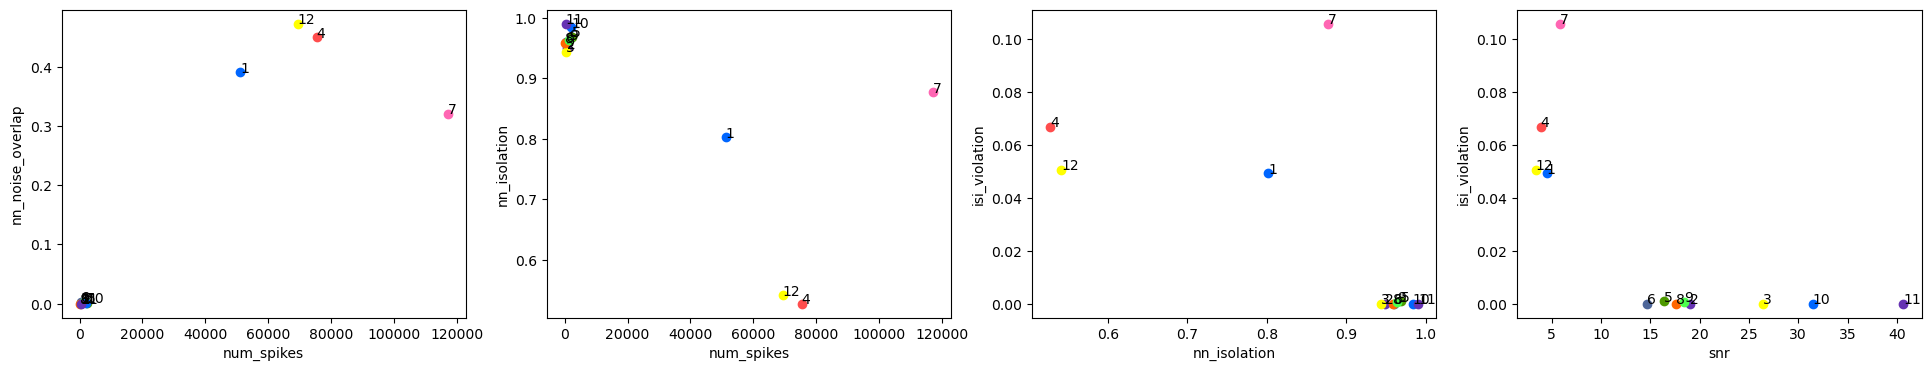

In [72]:
fig_m, axes_m = plot_metric(metric_pd,color_map)

In [66]:
success, noiseUnits_spike_num, noiseUnits_isi = find_noise_units(metric_pd)

spike_num_threshold 1055.5714285714287
spike_num_threshold 10555.714285714286
ISI threshold 0.00023520470285918424
ISI threshold 0.0023520470285918423
Auto noise exclusion success!
